In [2]:
#Packages
import pandas as pd
import numpy as np
import io
#!pip install xlrd --upgrade
import matplotlib
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Data import

In [3]:
#df = pd.read_excel("default of credit card clients.xls") #Read the excel file


df = pd.read_excel("default of credit card clients.xls", skiprows = 1)

In [8]:
y = df['default payment next month']
X = df.drop('default payment next month', axis = 1)

#Data Wrangling

### Exploratory Data Analysis (EDA)

rename_col= {"LIMIT_BAL": "Given_Credits",
            "PAY_0": "REPAY_SEPT",
            "PAY_2": "REPAY_AUG",
            "PAY_3": "REPAY_JULY",
            "PAY_4": "REPAY_JUN",
            "PAY_5": "REPAY_MAY",
            "PAY_6": "REPAY_APRIL",
            "BILL_AMT1": "SEPT_BILL",
            "BILL_AMT2": "AUG_BILL",
            "BILL_AMT3": "JULY_BILL",
            "BILL_AMT4": "JUN_BILL",
            "BILL_AMT5": "MAY_BILL",
            "BILL_AMT6": "APRIL_BILL",
            "PAY_AMT1": "PAY_SEPT",
            "PAY_AMT2": "PAY_AUG",
            "PAY_AMT3": "PAY_JULY",
            "PAY_AMT4": "PAY_JUN",
            "PAY_AMT5": "PAY_MAY",
            "PAY_AMT6": "PAY_APRIL",
            "default payment next month": "DEFAULT"}
df=df.rename(rename_col,axis=1)

In [ ]:
df.head(5)

In [14]:
rename_col= {"LIMIT_BAL": "Given_Credits", "PAY_0": "REPAY_SEPT", "PAY_2": "REPAY_AUG", "PAY_3": "REPAY_JULY", "PAY_4": "REPAY_JUN", "PAY_5": "REPAY_MAY", "PAY_6": "REPAY_APRIL", "BILL_AMT1": "SEPT_BILL", "BILL_AMT2": "AUG_BILL", "BILL_AMT3": "JULY_BILL", "BILL_AMT4": "JUN_BILL", "BILL_AMT5": "MAY_BILL", "BILL_AMT6": "APRIL_BILL", "PAY_AMT1": "PAY_SEPT", "PAY_AMT2": "PAY_AUG", "PAY_AMT3": "PAY_JULY", "PAY_AMT4": "PAY_JUN", "PAY_AMT5": "PAY_MAY", "PAY_AMT6": "PAY_APRIL", "default payment next month": "DEFAULT"} 

df=df.rename(rename_col,axis=1)

In [12]:
df.describe(include="all")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


NameError: name 'basic_details' is not defined

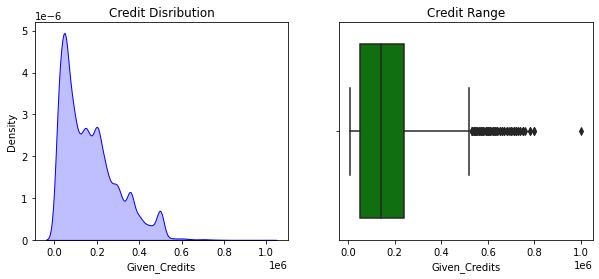

In [17]:
fig, axes=plt.subplots(1,2,figsize=(10,4))
sns.kdeplot(data=df,x="Given_Credits",color='b',fill=True,ax=axes[0])
sns.boxplot(x=df.Given_Credits,color='g',ax=axes[1])
axes[0].set_title("Credit Disribution")
axes[1].set_title("Credit Range")
plt.show()


#### SEX
Gender 1:male 2:Female

<function matplotlib.pyplot.show(close=None, block=None)>

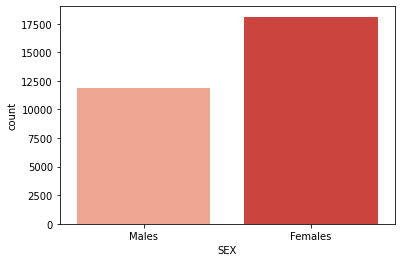

In [18]:
sns.countplot(data=df,x="SEX",palette='Reds')
plt.xticks(np.arange(2),labels=['Males','Females'])
plt.show

In [19]:
males_count = df[df.SEX==1].count()['SEX']
females_count = df[df.SEX==2].count()['SEX']
males_ratio = (males_count/ (df.shape[0]))*100
females_ratio = (females_count/df.shape[0])*100
print(f'males: count = {males_count} (about {np.round (males_ratio,2)} %) ')
print (f'females: count = {females_count} (about {np.round (females_ratio,2)} %)')

males: count = 11888 (about 39.63 %) 
females: count = 18112 (about 60.37 %)


EDUCATION
1:grad school,2:university,3:high school,4:others

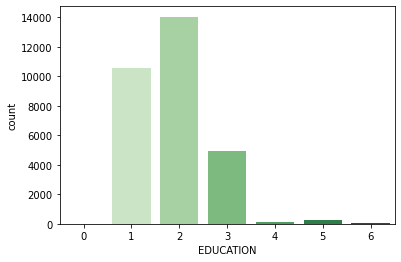

In [20]:
sns.countplot(data=df,x="EDUCATION",palette="Greens")
plt.show()

MARRIAGE
1:married 2:single 3:others

In [21]:
marriage_count=df.MARRIAGE.value_counts()
marriage_count

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

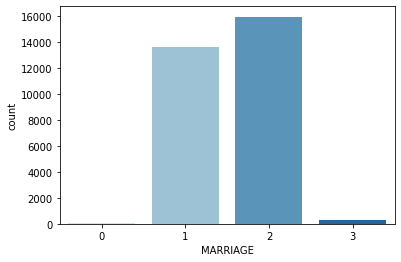

In [22]:

sns.countplot(data=df,x="MARRIAGE",palette="Blues")
plt.show()

AGE
(in years)

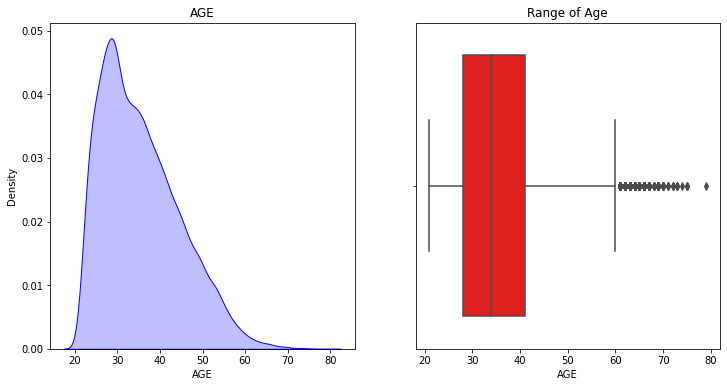

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.kdeplot(data=df, x="AGE", color='b',fill=True, ax=axes[0])
sns.boxplot (x=df.AGE, color='r', ax=axes[1])
axes[0]. set_title('AGE')
axes[1].set_title( 'Range of Age')
plt.show()

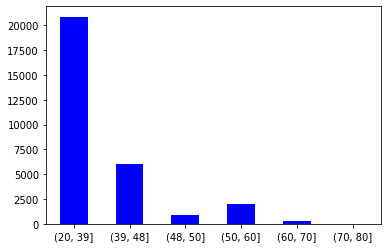

In [24]:
grp = pd.cut(df['AGE'], bins=[20, 39, 48, 50, 60,70,80],include_lowest=False)
ax = grp.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
plt.show()

In [25]:
grp.value_counts()

(20, 39]    20856
(39, 48]     6012
(50, 60]     1997
(48, 50]      863
(60, 70]      257
(70, 80]       15
Name: AGE, dtype: int64

### REPAYMENT STATUS
PAY_0: Repayment status in September, 2005
<br>PAY_2: Repayment status in August, 2005
<br>PAY_3: Repayment status in July, 2005
<br>PAY 4: Repayment status in June, 2005
<br>PAY_5: Repayment status in May, 2005
<br>PAY_6: Repayment status in April, 2005

#### VALUE MEANING
-1: DULY PAID
<br>1:1 MONTH DELAY
<br>2:2 MONTH DELAY
<br>3:3 MONTH DELAY
<br>...
<br>8:8 MONTH DELAY

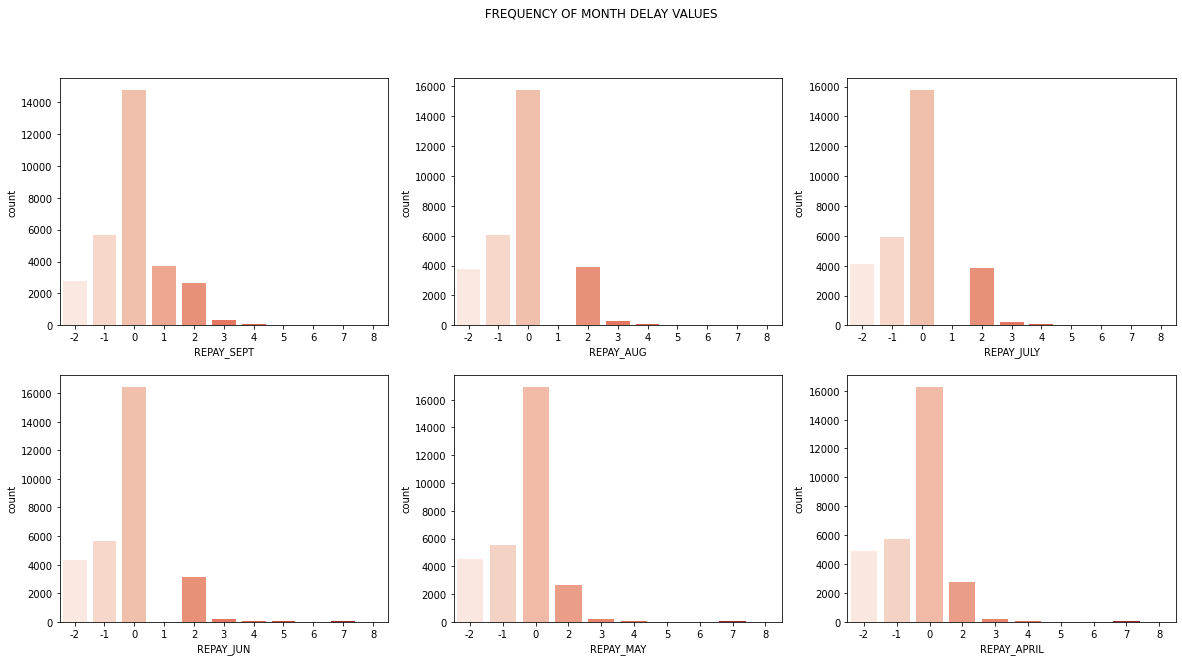

In [26]:
repay_part=df[['REPAY_SEPT','REPAY_AUG','REPAY_JULY','REPAY_JUN','REPAY_MAY','REPAY_APRIL','DEFAULT']]
f, axes=plt.subplots(2, 3, figsize=(20, 10), facecolor='white')
f.suptitle(' FREQUENCY OF MONTH DELAY VALUES')
ax1=sns.countplot(x= "REPAY_SEPT", data=repay_part,palette="Reds", ax=axes[0,0])
ax2=sns.countplot(x= "REPAY_AUG", data=repay_part,palette="Reds", ax=axes[0,1])
ax3=sns.countplot(x= "REPAY_JULY", data=repay_part,palette="Reds", ax=axes[0,2])
ax4=sns.countplot(x= "REPAY_JUN", data=repay_part,palette="Reds", ax=axes[1,0])
ax5=sns.countplot(x= "REPAY_MAY", data=repay_part,palette="Reds", ax=axes[1,1])
ax6=sns.countplot(x= "REPAY_APRIL",data=repay_part,palette="Reds", ax=axes[1,2])

### AMOUNT OF BILL STATEMENT
SEPT_BILL:Amount of bill statement in September, 2005
<br>AUG_BILL:Amount of bill statement in August, 2005
<br>JULY_BILL:Amount of bill statement in July, 2005
<br>JUN_BILL:Amount of bill statement in June,2005
<br>MAY_BILL:Amount of bill statement in May, 2005
<br>APRIL_BILL:Amount of bill statement in April,2005


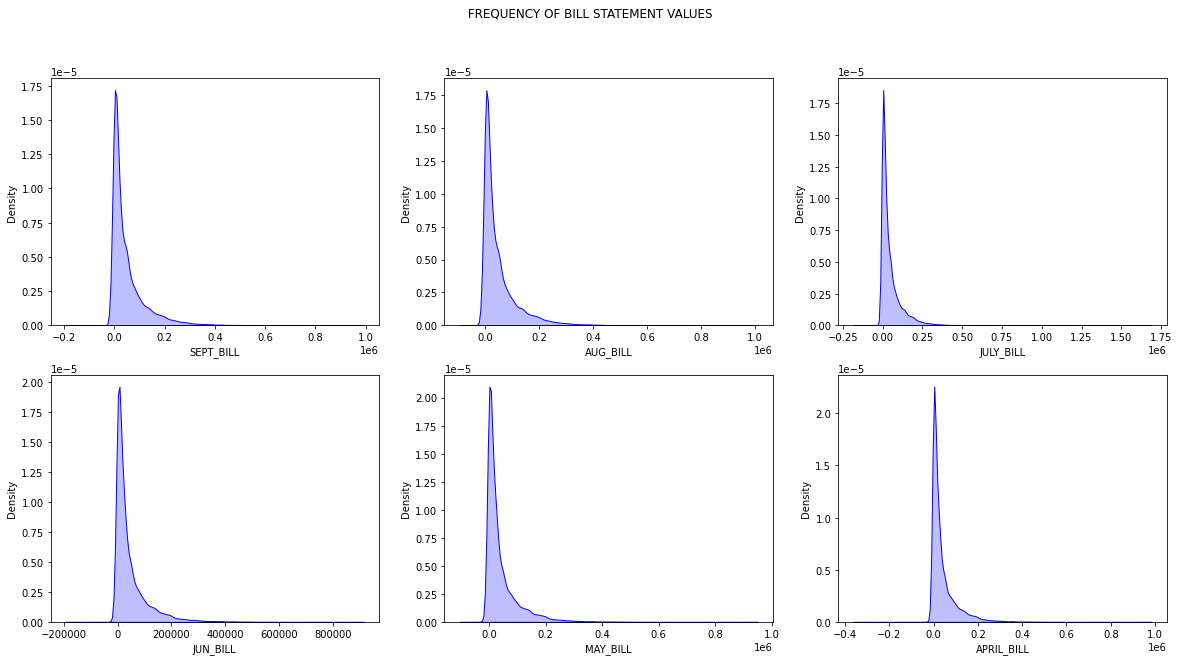

In [27]:
bill_part=df[['SEPT_BILL','AUG_BILL','JULY_BILL','JUN_BILL','MAY_BILL','APRIL_BILL']]
f, axes=plt.subplots(2, 3, figsize=(20, 10), facecolor='white')
f.suptitle(' FREQUENCY OF BILL STATEMENT VALUES ')
ax1=sns.kdeplot(x= "SEPT_BILL", data=bill_part,color='b',fill=True, ax=axes[0,0])
ax2=sns.kdeplot(x= "AUG_BILL", data=bill_part,color='b',fill=True, ax=axes[0,1])
ax3=sns.kdeplot(x= "JULY_BILL", data=bill_part,color='b',fill=True, ax=axes[0,2])
ax4=sns.kdeplot(x= "JUN_BILL", data=bill_part,color='b',fill=True, ax=axes[1,0])
ax5=sns.kdeplot(x= "MAY_BILL", data=bill_part,color='b',fill=True, ax=axes[1,1])
ax6=sns.kdeplot(x= "APRIL_BILL",data=bill_part,color='b',fill=True, ax=axes[1,2])

### DEFAULT
0:NO
<BR>1:YES    

In [28]:
df['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

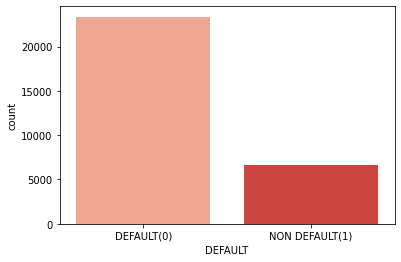

In [29]:
sns.countplot(data=df,x='DEFAULT',palette='Reds')
plt.xticks(np.arange(2),['DEFAULT(0)','NON DEFAULT(1)'])
plt.show()

### MULTIVARIATE ANALYSIS

#### SEX VS DEFAULT

In [30]:
def_male=df[(df['SEX']==1) &(df['DEFAULT']==1)].shape[0]
def_female=df[(df['SEX']==2) &(df['DEFAULT']==1)].shape[0]
print(f'Male_default:{def_male},Female_default:{def_female} ')
print(f'Male_default % :{def_male*100/males_count} ' )
print(f'Female_default % :{def_female*100/females_count} ' )      

Male_default:2873,Female_default:3763 
Male_default % :24.167227456258413 
Female_default % :20.776280918727917 


#### EDUCATION VS DEFAULT

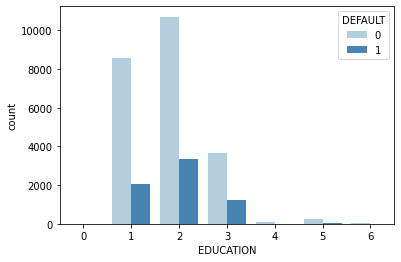

In [31]:
sns.countplot(data=df,x='EDUCATION',hue='DEFAULT',palette='Blues')
plt.show()

#### MARRIAGE VS DEFAULT

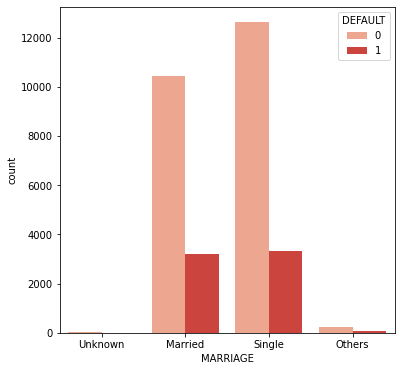

In [32]:
fig, ax=plt.subplots(figsize=(6,6))
sns.countplot(ax=ax,data=df,x="MARRIAGE",hue="DEFAULT",palette="Reds")
plt.xticks(np.arange(4),['Unknown','Married','Single','Others'])
plt.show()

#### AGE vs DEFAULT

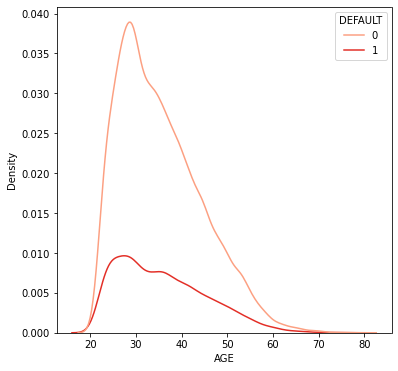

In [33]:
fig, ax=plt.subplots(figsize=(6,6))
sns.kdeplot(ax=ax,data=df,x="AGE",hue="DEFAULT",palette='Reds')
plt.show()

In [34]:
df.describe(include="all")

,ID,Given_Credits,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUN,...,JUN_BILL,MAY_BILL,APRIL_BILL,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUN,PAY_MAY,PAY_APRIL,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


NameError: name 'basic_details' is not defined

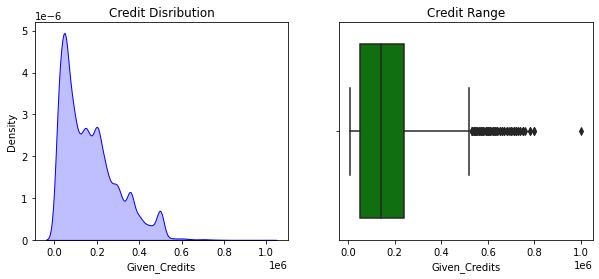

#### SEX
Gender 1:male <br>2:Female

<function matplotlib.pyplot.show(close=None, block=None)>

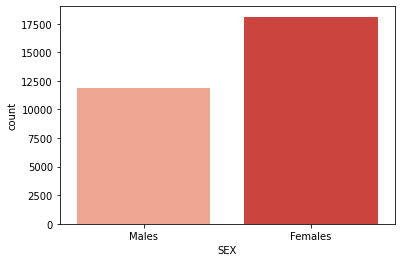

In [40]:
males_count = df[df.SEX==1].count()['SEX']
females_count = df[df.SEX==2].count()['SEX']
males_ratio = (males_count/ (df.shape[0]))*100
females_ratio = (females_count/df.shape[0])*100
print(f'males: count = {males_count} (about {np.round (males_ratio,2)} %) ')
print (f'females: count = {females_count} (about {np.round (females_ratio,2)} %)')

males: count = 11888 (about 39.63 %) 
females: count = 18112 (about 60.37 %)


#### EDUCATION
1:grad school<br>2:university<br>3:high school<br>4:others

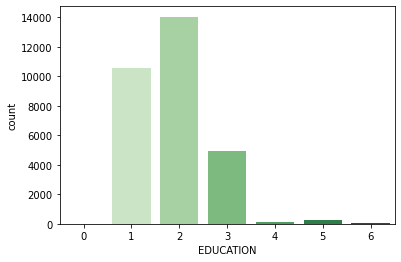

In [41]:
sns.countplot(data=df,x="EDUCATION",palette="Greens")
plt.show()

#### MARRIAGE
1:married<br> 2:single<br> 3:others

In [42]:
marriage_count=df.MARRIAGE.value_counts()
marriage_count

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

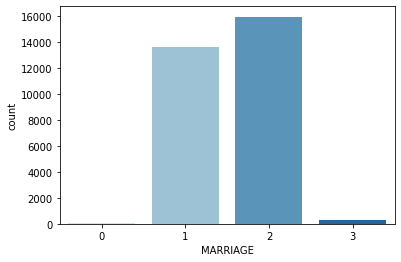

In [43]:

sns.countplot(data=df,x="MARRIAGE",palette="Blues")
plt.show()

#### AGE
(in years)

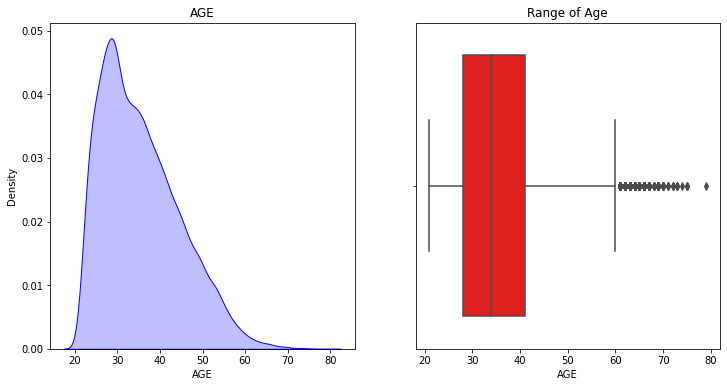

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.kdeplot(data=df, x="AGE", color='b',fill=True, ax=axes[0])
sns.boxplot (x=df.AGE, color='r', ax=axes[1])
axes[0]. set_title('AGE')
axes[1].set_title( 'Range of Age')
plt.show()

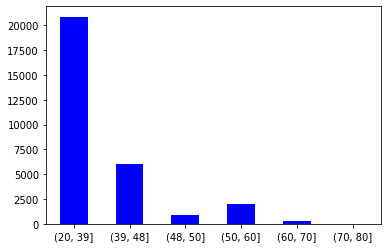

In [45]:
grp = pd.cut(df['AGE'], bins=[20, 39, 48, 50, 60,70,80],include_lowest=False)
ax = grp.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
plt.show()

In [46]:
grp.value_counts()

(20, 39]    20856
(39, 48]     6012
(50, 60]     1997
(48, 50]      863
(60, 70]      257
(70, 80]       15
Name: AGE, dtype: int64

### REPAYMENT STATUS
PAY_0: Repayment status in September, 2005
<br>PAY_2: Repayment status in August, 2005
<br>PAY_3: Repayment status in July, 2005
<br>PAY 4: Repayment status in June, 2005
<br>PAY_5: Repayment status in May, 2005
<br>PAY_6: Repayment status in April, 2005

#### VALUE MEANING
-1: DULY PAID
<br>1:1 MONTH DELAY
<br>2:2 MONTH DELAY
<br>3:3 MONTH DELAY
<br>...
<br>8:8 MONTH DELAY

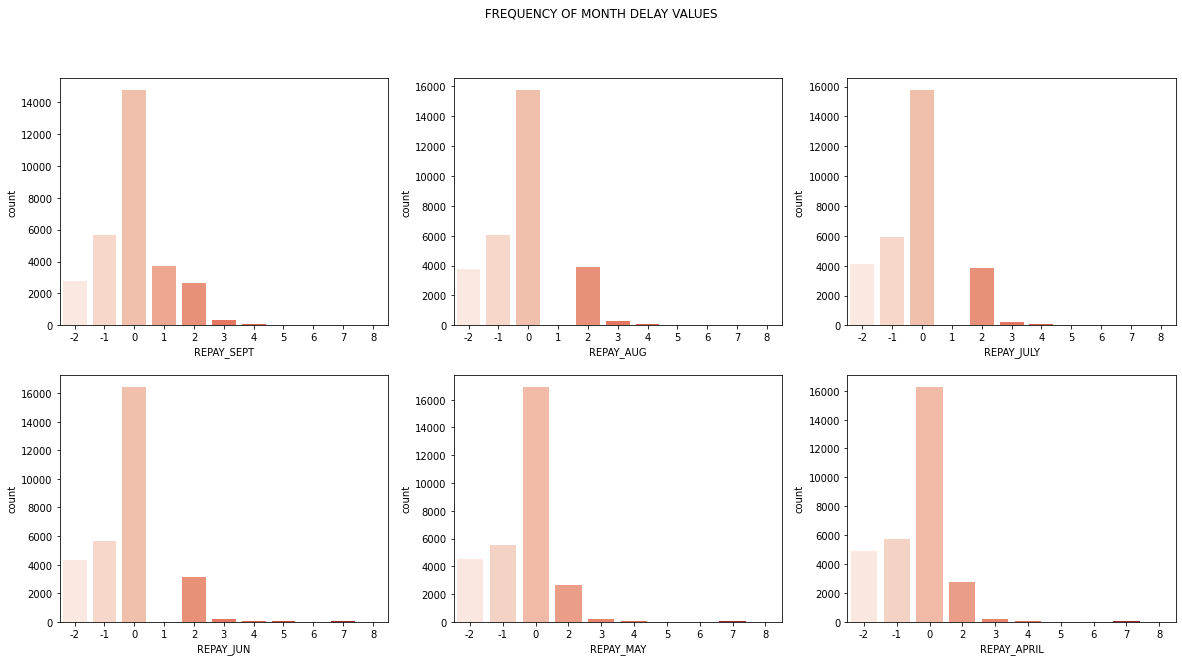

In [47]:
repay_part=df[['REPAY_SEPT','REPAY_AUG','REPAY_JULY','REPAY_JUN','REPAY_MAY','REPAY_APRIL','DEFAULT']]
f, axes=plt.subplots(2, 3, figsize=(20, 10), facecolor='white')
f.suptitle(' FREQUENCY OF MONTH DELAY VALUES')
ax1=sns.countplot(x= "REPAY_SEPT", data=repay_part,palette="Reds", ax=axes[0,0])
ax2=sns.countplot(x= "REPAY_AUG", data=repay_part,palette="Reds", ax=axes[0,1])
ax3=sns.countplot(x= "REPAY_JULY", data=repay_part,palette="Reds", ax=axes[0,2])
ax4=sns.countplot(x= "REPAY_JUN", data=repay_part,palette="Reds", ax=axes[1,0])
ax5=sns.countplot(x= "REPAY_MAY", data=repay_part,palette="Reds", ax=axes[1,1])
ax6=sns.countplot(x= "REPAY_APRIL",data=repay_part,palette="Reds", ax=axes[1,2])

### AMOUNT OF BILL STATEMENT
SEPT_BILL:Amount of bill statement in September, 2005
<br>AUG_BILL:Amount of bill statement in August, 2005
<br>JULY_BILL:Amount of bill statement in July, 2005
<br>JUN_BILL:Amount of bill statement in June,2005
<br>MAY_BILL:Amount of bill statement in May, 2005
<br>APRIL_BILL:Amount of bill statement in April,2005


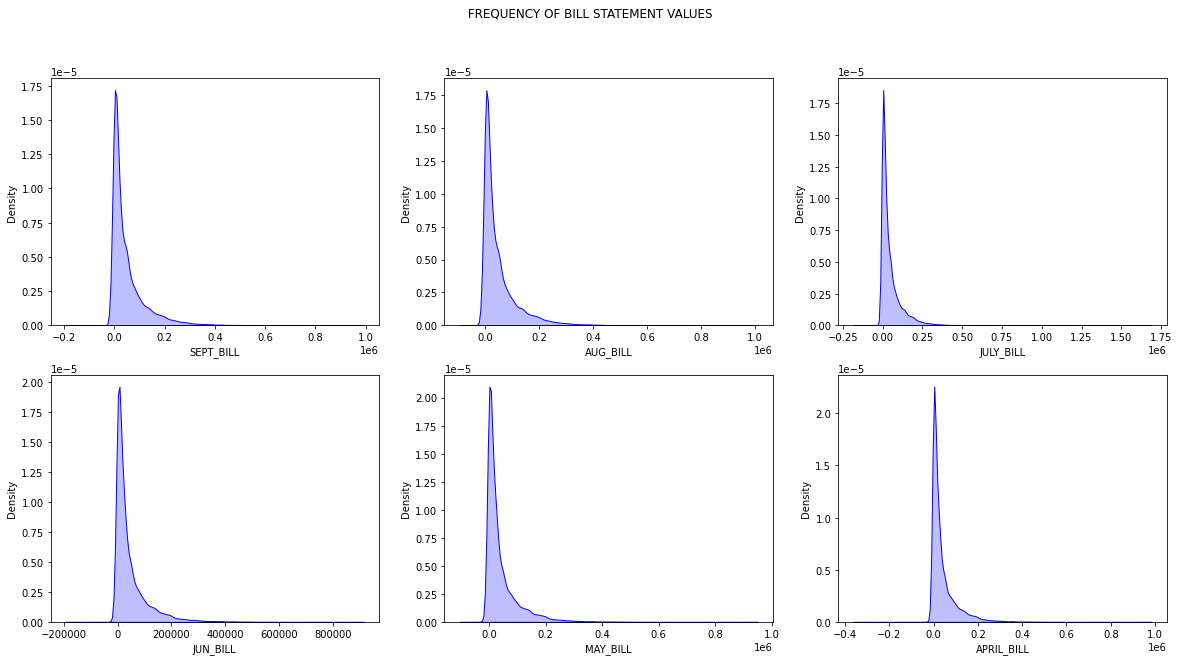

In [48]:
bill_part=df[['SEPT_BILL','AUG_BILL','JULY_BILL','JUN_BILL','MAY_BILL','APRIL_BILL']]
f, axes=plt.subplots(2, 3, figsize=(20, 10), facecolor='white')
f.suptitle(' FREQUENCY OF BILL STATEMENT VALUES ')
ax1=sns.kdeplot(x= "SEPT_BILL", data=bill_part,color='b',fill=True, ax=axes[0,0])
ax2=sns.kdeplot(x= "AUG_BILL", data=bill_part,color='b',fill=True, ax=axes[0,1])
ax3=sns.kdeplot(x= "JULY_BILL", data=bill_part,color='b',fill=True, ax=axes[0,2])
ax4=sns.kdeplot(x= "JUN_BILL", data=bill_part,color='b',fill=True, ax=axes[1,0])
ax5=sns.kdeplot(x= "MAY_BILL", data=bill_part,color='b',fill=True, ax=axes[1,1])
ax6=sns.kdeplot(x= "APRIL_BILL",data=bill_part,color='b',fill=True, ax=axes[1,2])

#### AMOUNT OF PREVIOUS PAYMENT

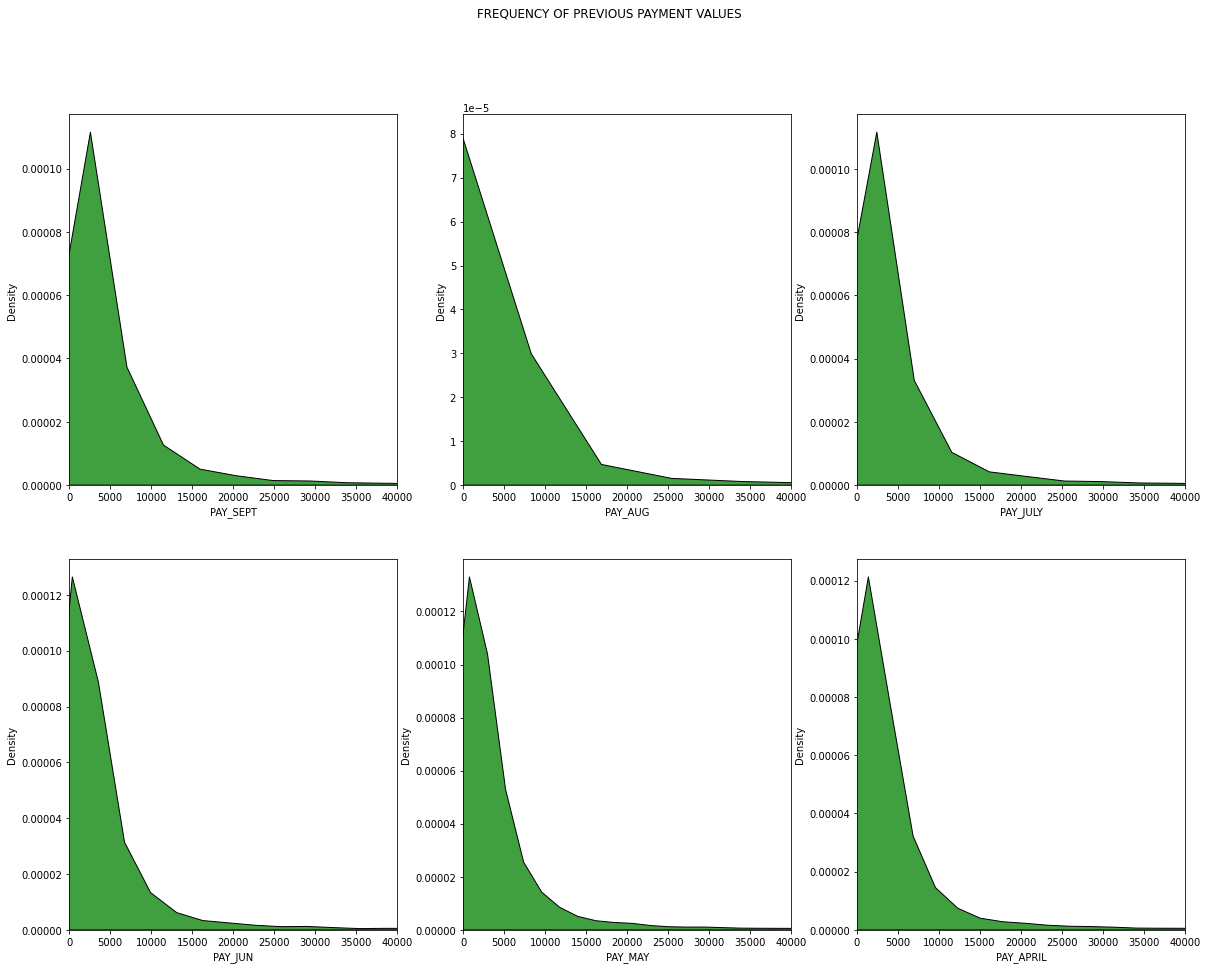

In [71]:
pay_part = df[['PAY_SEPT','PAY_AUG','PAY_JULY','PAY_JUN','PAY_MAY','PAY_APRIL']]

f,axes=plt.subplots (2, 3, figsize=(20, 15), facecolor='white')
f.suptitle("FREQUENCY OF PREVIOUS PAYMENT VALUES")

ax1= sns.kdeplot(x="PAY_SEPT", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[0,0])
ax1.set_xlim([0,40000])
ax2= sns.kdeplot(x="PAY_AUG", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[0,1])
ax2.set_xlim([0,40000])
ax3= sns.kdeplot(x="PAY_JULY", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[0,2])
ax3.set_xlim([0,40000])
ax4= sns.kdeplot(x="PAY_JUN", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[1,0])
ax4.set_xlim([0,40000])
ax5= sns.kdeplot(x="PAY_MAY", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[1,1])
ax5.set_xlim([0,40000])
ax6= sns.kdeplot(x="PAY_APRIL", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[1,2])
ax6.set_xlim([0,40000])             
plt. show()

### DEFAULT
0:NO
<BR>1:YES    

In [72]:
df['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

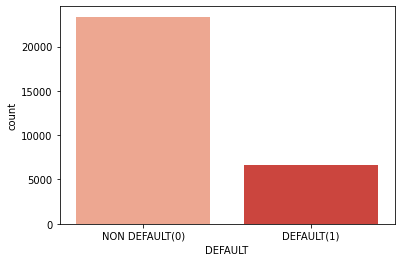

In [78]:
sns.countplot(data=df,x='DEFAULT',palette='Reds')
plt.x_title = 'Is User a Defaulter?'
plt.xticks(np.arange(2),['NON DEFAULT(0)','DEFAULT(1)'])
plt.show()

### MULTIVARIATE ANALYSIS

#### SEX VS DEFAULT

In [79]:
def_male=df[(df['SEX']==1) &(df['DEFAULT']==1)].shape[0]
def_female=df[(df['SEX']==2) &(df['DEFAULT']==1)].shape[0]
print(f'Male_default:{def_male},Female_default:{def_female} ')
print(f'Male_default % :{def_male*100/males_count} ' )
print(f'Female_default % :{def_female*100/females_count} ' )      

Male_default:2873,Female_default:3763 
Male_default % :24.167227456258413 
Female_default % :20.776280918727917 


#### EDUCATION VS DEFAULT

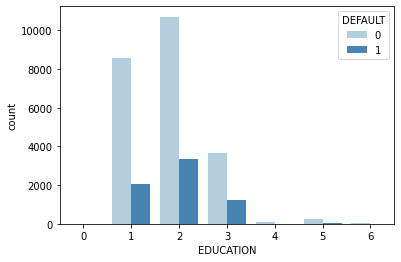

In [80]:
sns.countplot(data=df,x='EDUCATION',hue='DEFAULT',palette='Blues')
plt.show()

#### MARRIAGE VS DEFAULT

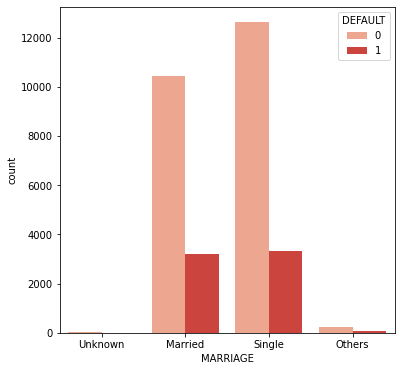

In [81]:
fig, ax=plt.subplots(figsize=(6,6))
sns.countplot(ax=ax,data=df,x="MARRIAGE",hue="DEFAULT",palette="Reds")
plt.xticks(np.arange(4),['Unknown','Married','Single','Others'])
plt.show()

#### AGE vs DEFAULT

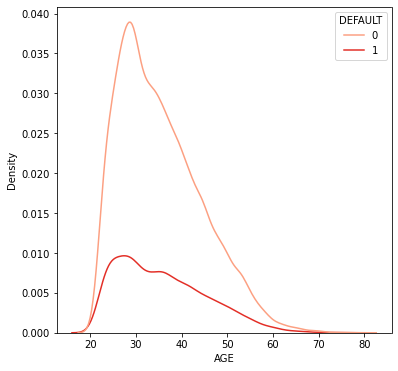

In [55]:
fig, ax=plt.subplots(figsize=(6,6))
sns.kdeplot(ax=ax,data=df,x="AGE",hue="DEFAULT",palette='Reds')
plt.show()

#### REPAY STATUS VS DEFAULT

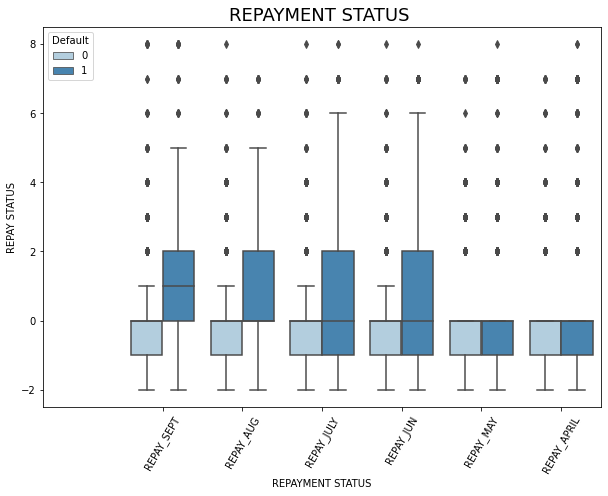

In [82]:
repay = pd.melt(repay_part, id_vars="DEFAULT", var_name="REPAYMENT STATUS", value_name="REPAY STATUS")
plt.figure(figsize=(10,7))
sns.boxplot (y= "REPAY STATUS", x="REPAYMENT STATUS", hue = "DEFAULT", data=repay, palette='Blues')
plt.legend (loc='best', title= 'Default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.xticks(rotation=60)
plt.title('REPAYMENT STATUS ', size=18)
plt. show()
# plt.savefig(*ImageName', format='png', dpi=200);

In [ ]:
#### BILL VS DEFAULT 

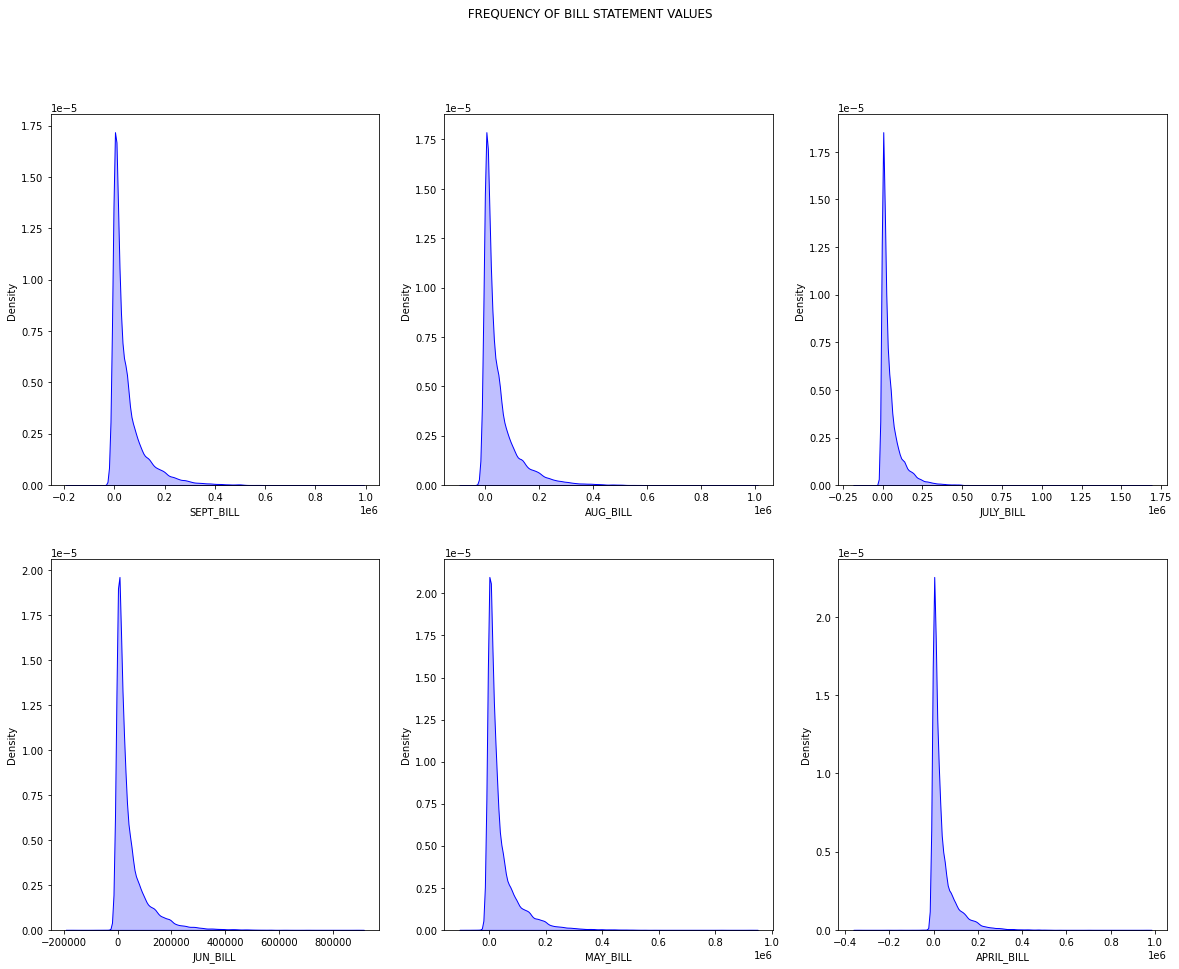

In [65]:
f, axes=plt.subplots(2,3,figsize=(20,15),facecolor='white')
f.suptitle(' FREQUENCY OF BILL STATEMENT VALUES ')
ax1=sns.kdeplot(x= "SEPT_BILL", data=bill_part,color='b',fill=True, ax=axes[0,0])
ax2=sns.kdeplot(x= "AUG_BILL", data=bill_part,color='b',fill=True, ax=axes[0,1])
ax3=sns.kdeplot(x= "JULY_BILL", data=bill_part,color='b',fill=True, ax=axes[0,2])
ax4=sns.kdeplot(x= "JUN_BILL",data=bill_part,color='b',fill=True, ax=axes[1,0])
ax5=sns.kdeplot(x= "MAY_BILL",data=bill_part,color='b',fill=True, ax=axes[1,1])
ax6=sns.kdeplot(x= "APRIL_BILL",data=bill_part,color='b',fill=True, ax=axes[1,2])

#### PREVIOUS PAYMENT AMOUNT VS DEFAULT

,count,mean,std,min,25%,50%,75%,max
PAY_SEPT,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
PAY_AUG,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0
PAY_JULY,30000.0,5225.681500,17606.961470,0.0,390.00,1800.0,4505.00,896040.0
PAY_JUN,30000.0,4826.076867,15666.159744,0.0,296.00,1500.0,4013.25,621000.0
PAY_MAY,30000.0,4799.387633,15278.305679,0.0,252.50,1500.0,4031.50,426529.0
PAY_APRIL,30000.0,5215.502567,17777.465775,0.0,117.75,1500.0,4000.00,528666.0
DEFAULT,30000.0,0.221200,0.415062,0.0,0.00,0.0,0.00,1.0


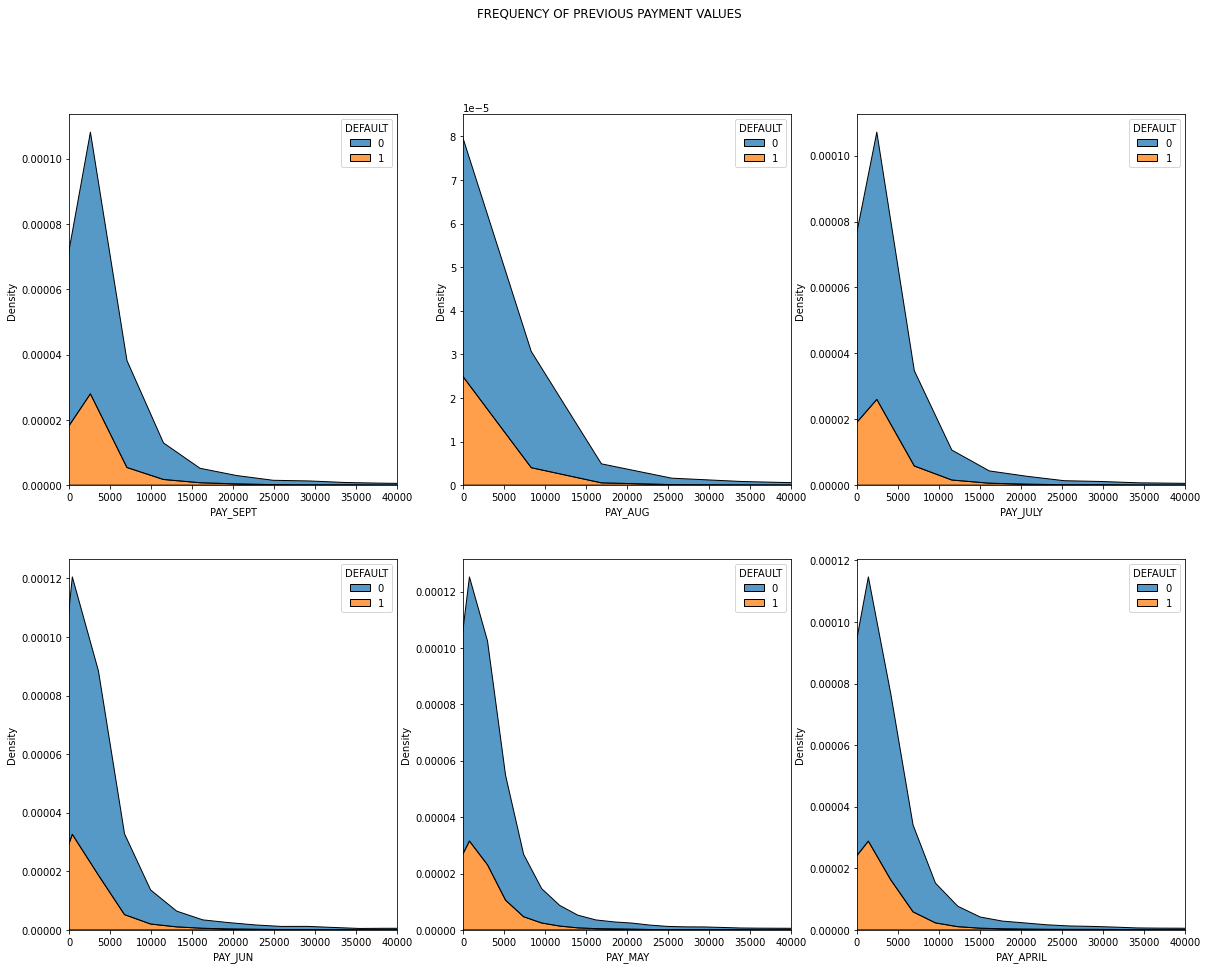

In [83]:
pay_part=df[['PAY_SEPT','PAY_AUG','PAY_JULY','PAY_JUN','PAY_MAY','PAY_APRIL','DEFAULT']]
display(pay_part.describe().T)
f,axes=plt.subplots (2, 3, figsize=(20, 15), facecolor='white')
f.suptitle("FREQUENCY OF PREVIOUS PAYMENT VALUES")

ax1= sns.kdeplot(x="PAY_SEPT", hue="DEFAULT", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[0,0])
ax1.set_xlim([0,40000])
ax2= sns.kdeplot(x="PAY_AUG", hue="DEFAULT", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[0,1])
ax2.set_xlim([0,40000])
ax3= sns.kdeplot(x="PAY_JULY", hue="DEFAULT", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[0,2])
ax3.set_xlim([0,40000])
ax4= sns.kdeplot(x="PAY_JUN", hue="DEFAULT", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[1,0])
ax4.set_xlim([0,40000])
ax5= sns.kdeplot(x="PAY_MAY", hue="DEFAULT", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[1,1])
ax5.set_xlim([0,40000])
ax6= sns.kdeplot(x="PAY_APRIL", hue="DEFAULT", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[1,2])
ax6.set_xlim([0,40000])             
plt. show()

### Converting Bill amt and Pay amt columns to float

In [40]:
df[df.columns[12:24]] = df[df.columns[12:24]].astype(float) 
df = df.drop('ID', axis=1)

In [41]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  int64  
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

### Dropping y labels and storing it in a different variable

In [42]:
y = df['default payment next month']
X = df.drop('default payment next month', axis = 1)

In [43]:
rename_col= {"LIMIT_BAL": "Given_Credits",
            "PAY_0": "REPAY_SEPT",
            "PAY_2": "REPAY_AUG",
            "PAY_3": "REPAY_JULY",
            "PAY_4": "REPAY_JUN",
            "PAY_5": "REPAY_MAY",
            "PAY_6": "REPAY_APRIL",
            "BILL_AMT1": "SEPT_BILL",
            "BILL_AMT2": "AUG_BILL",
            "BILL_AMT3": "JULY_BILL",
            "BILL_AMT4": "JUN_BILL",
            "BILL_AMT5": "MAY_BILL",
            "BILL_AMT6": "APRIL_BILL",
            "PAY_AMT1": "PAY_SEPT",
            "PAY_AMT2": "PAY_AUG",
            "PAY_AMT3": "PAY_JULY",
            "PAY_AMT4": "PAY_JUN",
            "PAY_AMT5": "PAY_MAY",
            "PAY_AMT6": "PAY_APRIL",
            "default payment next month": "DEFAULT"}
df=df.rename(rename_col,axis=1)

In [44]:
df.columns

Index(['Given_Credits', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'REPAY_SEPT',
       'REPAY_AUG', 'REPAY_JULY', 'REPAY_JUN', 'REPAY_MAY', 'REPAY_APRIL',
       'SEPT_BILL', 'AUG_BILL', 'JULY_BILL', 'JUN_BILL', 'MAY_BILL',
       'APRIL_BILL', 'PAY_SEPT', 'PAY_AUG', 'PAY_JULY', 'PAY_JUN', 'PAY_MAY',
       'PAY_APRIL', 'DEFAULT'],
      dtype='object')

## Visualization to check column correlation

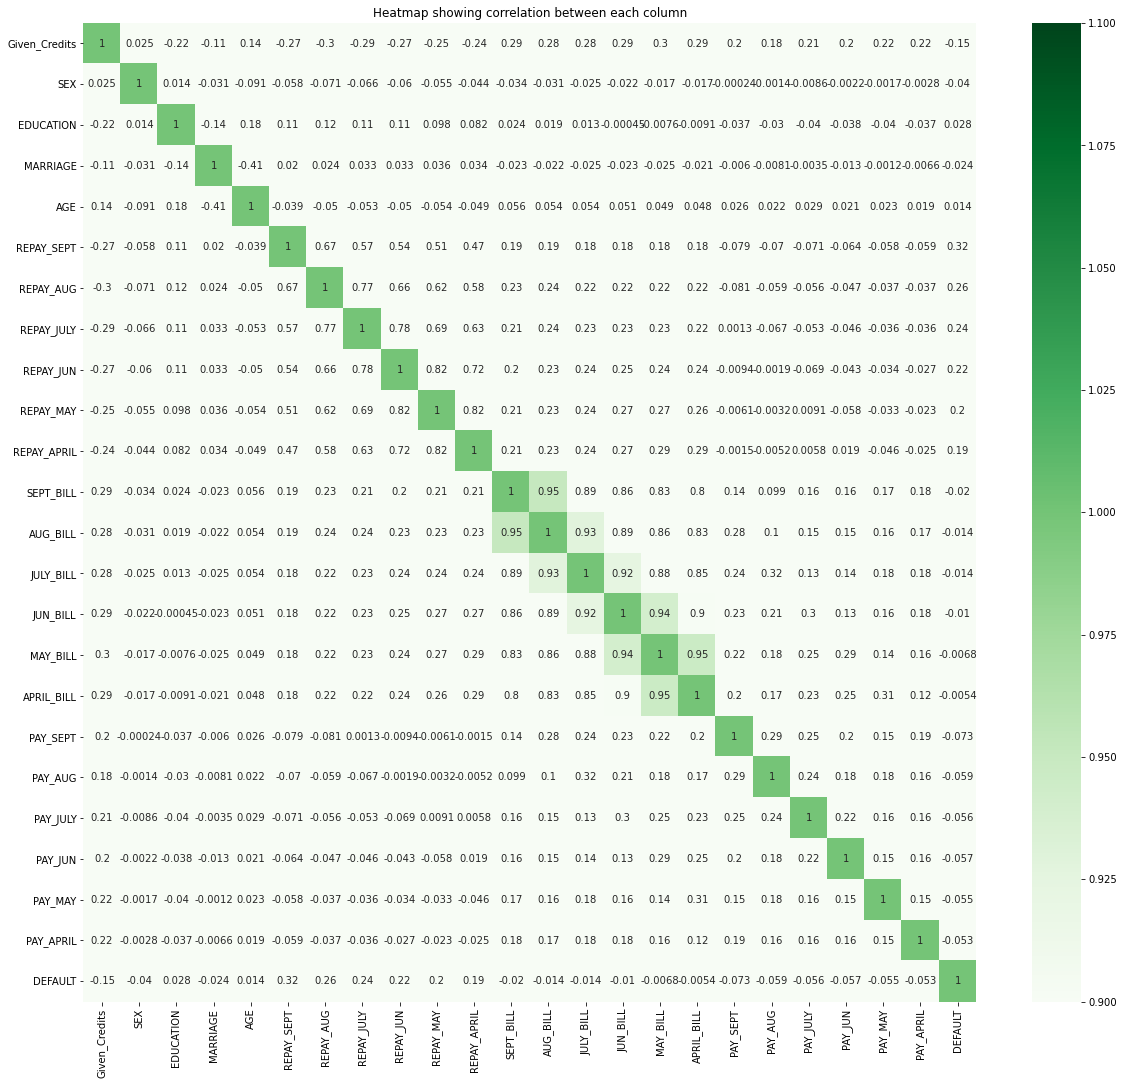

In [45]:
corr = df.corr()
plt.figure(figsize = (20,18))
sns.heatmap(corr, annot = True, vmin = 1.0, cmap = 'Greens')
plt.title('Heatmap showing correlation between each column')
plt.show()

In [67]:
{column: len(df[column].unique()) for column in df.columns}

{'Given_Credits': 81,
 'SEX': 2,
 'EDUCATION': 7,
 'MARRIAGE': 4,
 'AGE': 56,
 'REPAY_SEPT': 11,
 'REPAY_AUG': 11,
 'REPAY_JULY': 11,
 'REPAY_JUN': 11,
 'REPAY_MAY': 10,
 'REPAY_APRIL': 10,
 'SEPT_BILL': 22723,
 'AUG_BILL': 22346,
 'JULY_BILL': 22026,
 'JUN_BILL': 21548,
 'MAY_BILL': 21010,
 'APRIL_BILL': 20604,
 'PAY_SEPT': 7943,
 'PAY_AUG': 7899,
 'PAY_JULY': 7518,
 'PAY_JUN': 6937,
 'PAY_MAY': 6897,
 'PAY_APRIL': 6939,
 'DEFAULT': 2}

### Binary Encoding of Norminal Features Education and Marital Status

In [16]:
edu_df = pd.get_dummies(X['EDUCATION'], prefix = 'EDU')
mar_df = pd.get_dummies(X['MARRIAGE'], prefix = 'MAR')
#df_final = X.copy()
X = pd.concat([X, edu_df, mar_df], axis = 1)
X = X.drop(['EDUCATION', 'MARRIAGE'], axis = 1)

KeyError: 'EDUCATION'

In [15]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDU_0', 'EDU_1', 'EDU_2', 'EDU_3',
       'EDU_4', 'EDU_5', 'EDU_6', 'MAR_0', 'MAR_1', 'MAR_2', 'MAR_3'],
      dtype='object')

### Scaling

*To standardize all columns to make it even and lie between -1 and +1*

In [ ]:
scalar_np = StandardScaler()
X_np = scalar_np.fit_transform(X) # Returns numpy array, converting to PD in next line
X = pd.DataFrame(X_np, columns = X.columns)

Mean of all columns are now very close to 0

In [ ]:
X.head(), X.mean()

(   LIMIT_BAL       SEX       AGE     PAY_0     PAY_2     PAY_3     PAY_4  \
 0  -1.136720  0.810161 -1.246020  1.794564  1.782348 -0.696663 -0.666599   
 1  -0.365981  0.810161 -1.029047 -0.874991  1.782348  0.138865  0.188746   
 2  -0.597202  0.810161 -0.161156  0.014861  0.111736  0.138865  0.188746   
 3  -0.905498  0.810161  0.164303  0.014861  0.111736  0.138865  0.188746   
 4  -0.905498 -1.234323  2.334029 -0.874991  0.111736 -0.696663  0.188746   
 
       PAY_5     PAY_6  BILL_AMT1  ...     EDU_1   EDU_2     EDU_3     EDU_4  \
 0 -1.530046 -1.486041  -0.642501  ... -0.738375  1.0669 -0.442752 -0.064163   
 1  0.234917  1.992316  -0.659219  ... -0.738375  1.0669 -0.442752 -0.064163   
 2  0.234917  0.253137  -0.298560  ... -0.738375  1.0669 -0.442752 -0.064163   
 3  0.234917  0.253137  -0.057491  ... -0.738375  1.0669 -0.442752 -0.064163   
 4  0.234917  0.253137  -0.578618  ... -0.738375  1.0669 -0.442752 -0.064163   
 
       EDU_5     EDU_6     MAR_0     MAR_1     MAR_2  

# Train Model using packages to compare Accuracy between different models

## Train - Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 10)

## Logistic Regression

In [ ]:
model_LR = LogisticRegression().fit(X_train, y_train)

In [ ]:
model_LR.score(X_test, y_test) * 100

NameError: ignored

In [17]:
# Actual Code (building model)
        
